# 0. Pacotes

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 
import pandas as pd
import numpy as np
import string, os 
import warnings
!pip install langdetect
import langdetect
!pip install transformers
!pip install pytorch
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
!pip install tabulate
from tabulate import tabulate
!pip install wordcloud
from google.colab import drive
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=5b096a62d9dff6b70df5d9249fc4733971baa7ebb4b1710ed85eaf65dae25f3b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  err

# 1. Aplicando o modelo LSTM proposto no Artigo

Artigo de Referência:

https://towardsdatascience.com/automatically-generate-hotel-descriptions-with-lstm-afa37002d4fc

In [ ]:
#Carreando a base
hotel_df= pd.read_json('/content/gdrive/My Drive/Colab Notebooks/inventory_hotel_BR_pt.json')


In [ ]:
#Manipulando a base para diminuir o numero de linhas e trabalhar apenas com as colunas necessárias 
hotel_df = hotel_df[['name','description']]
hotel_df = hotel_df[0:500]
all_descriptions = list(hotel_df['description'].values)

hotel_df

,name,description
0,Best Western Hôtel New York Nice,"Located in Nice's city center, Best Western Ho..."
1,Comfort Inn Hyde Park,"In London's Bayswater district, the Comfort In..."
2,Best Western Plus Dayton Hotel & Suites,Breakfast is offered daily and rooms feature f...
3,"The Elizabeth Hotel, Autograph Collection","The Elizabeth Hotel, Autograph Collection feat..."
4,Grand Mercure Vila Olímpia,"Localizado no coração de São Paulo, o Grand Me..."
...,...,...
495,Kelta,"In the Hostería Kelta, located in the Province..."
496,WorldMark Running Y,"Offering an indoor swimming pool, this Klamath..."
497,Hotel Kirst,<h3>Localização Do Estabelecimento</h3>\nCom u...
498,Motel 6,A short drive from beautiful beaches and easil...


In [ ]:
hotel_df.shape


(500, 2)

In [ ]:
#Exemplo da descrção de um dos hoteis da base.
corpus = [x for x in all_descriptions]
corpus[:1]


["Located in Nice's city center, Best Western Hotel Lakmi Nice is located on Avenue Jean Medecin, Nice's main shopping street which leads to Place Massena. It is next to Nice Etoile Shopping Center and is just 1969 feet from Nice- Ville Train Station. Each spacious air-conditioned guest room has a flat- screen TV and a private bathroom fitted with a hairdryer. Some of the soundproofed rooms feature wrought iron furniture and some rooms offer a balcony. WiFi access is available throughout the hotel. A buffet breakfast is served every morning in the breakfast room at the Best Western Hotel Lakmi Nice. Newspapers are available for guests and there is also a bar on site. The Promenade des Anglais is a 13-minute walk from the hotel and Vieux Nice, the historic district, is a 15-minute walk away. Six private parking spaces are available on site at an additional cost, which cannot be booked in advance. ((* Sorry, this information is not available in the selected language and is shown in EN)."

In [ ]:
#Padronizando os textos(aplicação de letra minuscula,retirada de caracteres especiais) 
#levantamento de contagem de palavras e recorrência 

t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
t.fit_on_texts(corpus)

In [ ]:
from collections import OrderedDict
# A dictionary of words and their counts.
word_counts = t.word_counts
sorted_words = OrderedDict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))
top_30_words = list(sorted_words.items())[:30]
print("top30 palavras mais recorrentes:")
for word, count in top_30_words:
    print(f"{word}: {count}")


#print(t.word_counts.sorted())

# A dictionary of words and how many documents each appeared in.
#print(t.word_docs)

# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)
#print(t.document_count)

# A dictionary of words and their uniquely assigned integers.
#print(t.word_index)

top30 palavras mais recorrentes:
the: 2940
and: 2931
a: 2585
is: 2203
in: 1800
de: 1308
hotel: 994
mi: 942
of: 853
km: 847
this: 771
with: 758
from: 730
available: 718
at: 638
e: 597
1: 591
br: 580
as: 544
to: 517
are: 515
rooms: 505
free: 495
2: 474
0: 444
not: 435
en: 433
information: 430
selected: 430
language: 422


In [ ]:
!pip install --upgrade pip

!pip install --upgrade Pillow

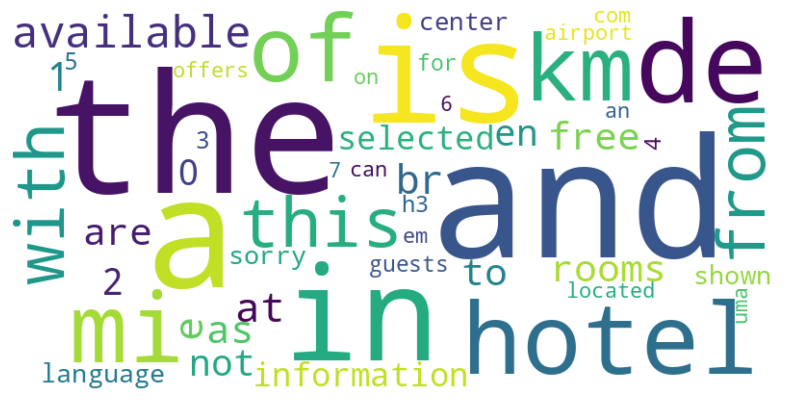

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_counts = t.word_counts

# Criar um dicionário de palavras para a nuvem
wordcloud_dict = {word: count for word, count in list(sorted_words.items())[:50]}

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
print('Found %s unique tokens.' % len(t.word_index))

Found 7553 unique tokens.


Tokenization: Padronizando os textos(aplicação de letra minuscula,retirada de caracteres especiais)
- Remoção de pontuação e caracteres especiais.
- Textos em sequências de palavras separadas por espaço em letras minúsculas.
- Divisão das sequencias em tokens.
- char_level=False : cada palavra será tratada como um token diferente de caractere.
- As listas de tokens são indexadas e vetorizadas.


In [ ]:
# Tokenization
t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def get_sequence_of_tokens(corpus):
    t.fit_on_texts(corpus)
    total_words = len(t.word_index) + 1
    
    input_sequences = []
    for line in corpus:
        token_list = t.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
            
    return input_sequences, total_words

In [ ]:
input_sequences, total_words = get_sequence_of_tokens(corpus)


As frases passam a ser representadas por números.

"Located(45) in Nice's city center, Best Western Hotel Lakmi Nice is located(45) on Avenue Jean Medecin" é representado pela sequencia abaixo:

In [ ]:
input_sequences[:15]

[[45, 5],
 [45, 5, 2698],
 [45, 5, 2698, 94],
 [45, 5, 2698, 94, 33],
 [45, 5, 2698, 94, 33, 279],
 [45, 5, 2698, 94, 33, 279, 343],
 [45, 5, 2698, 94, 33, 279, 343, 7],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43, 1338],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43, 1338, 3870],
 [45, 5, 2698, 94, 33, 279, 343, 7, 2699, 1337, 4, 45, 43, 1338, 3870, 3871]]

In [ ]:
corpus[:1]

["Located in Nice's city center, Best Western Hotel Lakmi Nice is located on Avenue Jean Medecin, Nice's main shopping street which leads to Place Massena. It is next to Nice Etoile Shopping Center and is just 1969 feet from Nice- Ville Train Station. Each spacious air-conditioned guest room has a flat- screen TV and a private bathroom fitted with a hairdryer. Some of the soundproofed rooms feature wrought iron furniture and some rooms offer a balcony. WiFi access is available throughout the hotel. A buffet breakfast is served every morning in the breakfast room at the Best Western Hotel Lakmi Nice. Newspapers are available for guests and there is also a bar on site. The Promenade des Anglais is a 13-minute walk from the hotel and Vieux Nice, the historic district, is a 15-minute walk away. Six private parking spaces are available on site at an additional cost, which cannot be booked in advance. ((* Sorry, this information is not available in the selected language and is shown in EN)."

In [ ]:
total_words

7554

Deixando as sequences com o mesmo comprimento, transformando numeros inteiros em uma matriz 2D (num_samples,maxlen)

In [ ]:
# pad sequences 
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes = total_words)
    
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(input_sequences)

Criando o Modelo:
- Modelo LSTM com 100 unidades de memória
- Dropout com probalidade de 10.
- Problema de classificação de palavra com 7553 classes.
- Camada de saída Dense com ativação em softmax.
- Uso de otimização ADAM para velocidade

In [ ]:
def create_model(max_sequence_len, total_words):
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=max_sequence_len - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 727, 10)           75540     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 7554)              762954    
                                                                 
Total params: 882,894
Trainable params: 882,894
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(predictors, label, epochs=10, verbose=5)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
def generate_text(seed_text, next_words, model, max_seq_len):
    for _ in range(next_words):
        token_list = t.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ''
        
        for word,index in t.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        seed_text = seed_text + " " + output_word
        
    return seed_text.title()

In [ ]:
print(generate_text("hilton seattle downtown", 100, model, max_sequence_len))


Hilton Seattle Downtown Hotel Is Located In The Heart Of The Historic Of The Hotel In The Heart Of The Heart Of The Heart Of The Hotel The Hotel Is Within Walking Distance Of The Hotel And The Beach Of The Hotel The Hotel Is Within Walking Distance Of The Hotel And The Hotel Is Just Minutes Away From The Hotel And The Hotel Is A Short Drive Away The Hotel Is A Short Drive Away And A Variety Of The Hotel The Hotel Offers A Variety Of The Hotel In The Hotel In The Hotel In The Heart Of The Heart Of


In [ ]:
print(generate_text("Holiday Inn Express - New York City, City-center hotel, walk to Madison Square Garden", 100, model, max_sequence_len))

Holiday Inn Express - New York City, City-Center Hotel, Walk To Madison Square Garden By Wyndham Wapakoneta Is A Short Drive From The Beach Of The Beach The Hotel Is Just A Short Drive From The Hotel And The Beach Of The City Of The Hotel The Hotel Is Just Close From The Historic Of The The Conditioned And The Hotel The Hotel Is Just Minutes From The Historic Of The Hotel The Hotel Is Within Walking Distance Of The Hotel The Hotel Is Just A Short Drive Away And A Variety Of The Hotel The Hotel Offers A Variety Of The Hotel In The Hotel In The Hotel In The Hotel In The


# 2. - Classificando as descrições por idioma


### 2.1 Apenas descrições em português

- Identificação do idioma das descrições, visando otimizar o modelo.
- Utilização da Descrição curta e aumanto das camadas de teste.

In [2]:
data = pd.read_json('/content/gdrive/My Drive/Colab Notebooks/inventory_hotel_BR_pt.json')
data = data[['short_description','description']]


In [3]:
data['idioma'] = ''


for i in range(len(data['description'])):
    description = str(data['description'][i])
    if description.strip() and len(description) > 3:
        data.at[i, 'idioma'] = langdetect.detect(description)
    else:
        data.at[i, 'idioma'] = 'Desconhecido'

data

,short_description,description,idioma
0,"Nice, France. ((* Sorry, this information is n...","Located in Nice's city center, Best Western Ho...",en
1,Notting Hill - Paddington Station Area. ((* So...,"In London's Bayswater district, the Comfort In...",en
2,Há várias opções de lazer e entretenimento ao ...,Breakfast is offered daily and rooms feature f...,en
3,"Fort Collins North. ((* Sorry, this informatio...","The Elizabeth Hotel, Autograph Collection feat...",en
4,"Localizado no coração de São Paulo, o Grand Me...","Localizado no coração de São Paulo, o Grand Me...",pt
...,...,...,...
101873,"Haines City. ((* Sorry, this information is no...",The Rodeway Inn & Suites hotel is a 15 minutes...,en
101874,"Hotel Mi Colombia is a central hotel, ideal fo...","Hotel Mi Colombia is a central hotel, ideal fo...",en
101875,"Vouliagmeni. ((* Sorry, this information is no...","Located in the exclusive area of Vouliagmeni, ...",en
101876,"Property Location : Located in Marmaris, Umut ...","Property Location : Located in Marmaris, Umut ...",en


In [ ]:
name_counts = data['idioma'].value_counts()
name_counts_df = pd.DataFrame({'Nome': name_counts.index, 'Contagem': name_counts.values})
total = name_counts_df['Contagem'].sum()
name_counts_df['Percentual'] = (name_counts_df['Contagem'] / total * 100).round(1)
table = tabulate(name_counts_df, headers='keys', tablefmt='fancy_grid')
print(table)

╒════╤══════════════╤════════════╤══════════════╕
│    │ Nome         │   Contagem │   Percentual │
╞════╪══════════════╪════════════╪══════════════╡
│  0 │ en           │      88574 │         86.9 │
├────┼──────────────┼────────────┼──────────────┤
│  1 │ pt           │      12568 │         12.3 │
├────┼──────────────┼────────────┼──────────────┤
│  2 │ es           │        344 │          0.3 │
├────┼──────────────┼────────────┼──────────────┤
│  3 │ Desconhecido │        303 │          0.3 │
├────┼──────────────┼────────────┼──────────────┤
│  4 │ tr           │         41 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  5 │ ro           │         25 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  6 │ fr           │         11 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  7 │ de           │          4 │          0   │
├────┼──────────────┼────────────┼──────────────┤
│  8 │ ca           │          3 │          0   │


In [ ]:
hotelBR_df= data[data['idioma']=='pt']
hotelBR_df.reset_index(inplace = True)
hotelBR_df = hotelBR_df[0:300]

In [ ]:
hotelBR_df

,index,short_description,description,idioma
0,4,"Localizado no coração de São Paulo, o Grand Me...","Localizado no coração de São Paulo, o Grand Me...",pt
1,8,Com uma estadia Candiland Apartment em Semaran...,<h3>Localização Do Estabelecimento</h3>\nCom u...,pt
2,10,"Deleite-se com uma ida ao spa, que oferece mas...",<h3>Localização Do Estabelecimento</h3>\nEm La...,pt
3,21,Este agradável hotel encontra-se em Norco Area...,"Não perca as atividades de recreação, como uma...",pt
4,24,"Em Chetumal, Hotel Mexico ficará a 2 minuto(s)...",<h3>Localização Do Estabelecimento</h3>\nEm Ch...,pt
...,...,...,...,...
295,2192,Estilo e conforto completam as 172 acomodações...,Estilo e conforto completam as 172 acomodações...,pt
296,2195,Contemple fantásticas vistas a partir da açote...,Aprecie a vista em um terraço e um jardim e ap...,pt
297,2222,Algumas das comodidades e serviços em destaque...,"Aproveite a conveniência de comodidades, como ...",pt
298,2235,Participe nas várias atividades recreativas do...,Participe nas várias atividades recreativas do...,pt


In [ ]:
all_descriptionsBR = list(hotelBR_df['short_description'].values)

hotelBR_df.describe()

,index
count,300.000000
mean,1111.026667
std,673.133783
min,4.000000
25%,524.500000
50%,1135.500000
75%,1676.000000
max,2253.000000


In [ ]:
hotelBR_df.columns

Index(['index', 'short_description', 'description', 'idioma'], dtype='object')

In [ ]:
#hotelBR_df[['name','price_currency','possible_integrators','description','short_description','small_description']]

In [ ]:
corpusBR = [x for x in all_descriptionsBR]
corpusBR[:1]


['Localizado no coração de São Paulo, o Grand Mercure SP Vila Olimpia (ex Caesar Business) está próximo a grandes centros financeiros e importantes empresas. Por perto, há também excelentes bares e restaurantes, shoppings e variados locais de entreteni']

In [ ]:
tBR = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tBR.fit_on_texts(corpusBR)

In [ ]:
# A dictionary of words and their counts.
print(tBR.word_counts)

# A dictionary of words and how many documents each appeared in.
#print(tBR.word_docs)

# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)
#print(tBR.document_count)

# A dictionary of words and their uniquely assigned integers.
#print(tBR.word_index)

OrderedDict([('localizado', 20), ('no', 75), ('coração', 5), ('de', 646), ('são', 30), ('paulo', 4), ('o', 158), ('grand', 5), ('mercure', 1), ('sp', 2), ('vila', 3), ('olimpia', 1), ('ex', 2), ('caesar', 1), ('business', 1), ('está', 46), ('próximo', 11), ('a', 320), ('grandes', 1), ('centros', 1), ('financeiros', 1), ('e', 516), ('importantes', 2), ('empresas', 1), ('por', 9), ('perto', 2), ('há', 6), ('também', 27), ('excelentes', 1), ('bares', 5), ('restaurantes', 5), ('shoppings', 3), ('variados', 2), ('locais', 6), ('entreteni', 1), ('com', 102), ('uma', 241), ('estadia', 18), ('candiland', 1), ('apartment', 5), ('em', 102), ('semarang', 3), ('ficará', 20), ('5', 41), ('minutos', 36), ('carro', 23), ('indonesia', 2), ('kaya', 1), ('park', 9), ('old', 2), ('post', 1), ('office', 1), ('este', 62), ('hotel', 131), ('2', 57), ('km', 96), ('1', 26), ('mi', 53), ('akademi', 1), ('kepolisian', 1), ('3', 28), ('ciputra', 1), ('mall', 1), ('deleite', 7), ('se', 67), ('ida', 11), ('ao', 88

In [ ]:
print('Found %s unique tokens.' % len(tBR.word_index))

Found 1886 unique tokens.


In [ ]:
# Tokenization
tBR = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def get_sequence_of_tokensBR(corpusBR):
    tBR.fit_on_texts(corpusBR)
    total_wordsBR = len(tBR.word_index) + 1
    
    input_sequencesBR = []
    for line in corpusBR:
        token_list = tBR.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequencesBR.append(n_gram_sequence)
            
    return input_sequencesBR, total_wordsBR

In [ ]:
input_sequencesBR, total_wordsBR = get_sequence_of_tokensBR(corpusBR)


In [ ]:
input_sequencesBR[:10]

[[101, 23],
 [101, 23, 245],
 [101, 23, 245, 1],
 [101, 23, 245, 1, 62],
 [101, 23, 245, 1, 62, 286],
 [101, 23, 245, 1, 62, 286, 5],
 [101, 23, 245, 1, 62, 286, 5, 246],
 [101, 23, 245, 1, 62, 286, 5, 246, 705],
 [101, 23, 245, 1, 62, 286, 5, 246, 705, 447],
 [101, 23, 245, 1, 62, 286, 5, 246, 705, 447, 341]]

In [ ]:
total_wordsBR

1887

In [ ]:
# pad sequences 
def generate_padded_sequencesBR(input_sequencesBR):
    max_sequence_lenBR = max([len(x) for x in input_sequencesBR])
    input_sequencesBR = np.array(pad_sequences(input_sequencesBR, maxlen = max_sequence_lenBR, padding = 'pre'))
    predictorsBR, labelBR = input_sequencesBR[:,:-1],input_sequencesBR[:,-1]
    labelBR = ku.to_categorical(labelBR, num_classes = total_wordsBR)
    
    return predictorsBR, labelBR, max_sequence_lenBR

predictorsBR, labelBR, max_sequence_lenBR = generate_padded_sequencesBR(input_sequencesBR)

In [ ]:
def create_modelBR(max_sequence_lenBR, total_wordsBR):
    modelBR = Sequential()
    
    # Add Input Embedding Layer
    modelBR.add(Embedding(total_wordsBR, 10, input_length=max_sequence_lenBR - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    modelBR.add(LSTM(100))
    modelBR.add(Dropout(0.1))
    
    # Add Output Layer
    modelBR.add(Dense(total_wordsBR, activation='softmax'))

    modelBR.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return modelBR

modelBR = create_modelBR(max_sequence_lenBR, total_wordsBR)
modelBR.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 55, 10)            18870     
                                                                 
 lstm_1 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1887)              190587    
                                                                 
Total params: 253,857
Trainable params: 253,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelBR.fit(predictorsBR, labelBR, epochs=50, verbose=1)

Epoch 1/50
321/321 [==============================] - 34s 98ms/step - loss: 6.1791 - accuracy: 0.0616
Epoch 2/50
321/321 [==============================] - 10s 31ms/step - loss: 5.6153 - accuracy: 0.0627
Epoch 3/50
321/321 [==============================] - 4s 13ms/step - loss: 5.2359 - accuracy: 0.0804
Epoch 4/50
321/321 [==============================] - 4s 13ms/step - loss: 4.8889 - accuracy: 0.1214
Epoch 5/50
321/321 [==============================] - 4s 12ms/step - loss: 4.5709 - accuracy: 0.1767
Epoch 6/50
321/321 [==============================] - 5s 16ms/step - loss: 4.3631 - accuracy: 0.2075
Epoch 7/50
321/321 [==============================] - 3s 9ms/step - loss: 4.1086 - accuracy: 0.2532
Epoch 8/50
321/321 [==============================] - 3s 9ms/step - loss: 3.8779 - accuracy: 0.2801
Epoch 9/50
321/321 [==============================] - 3s 9ms/step - loss: 3.6824 - accuracy: 0.3101
Epoch 10/50
321/321 [==============================] - 3s 8ms/step - loss: 3.5050 - accuracy

In [ ]:
def generate_textBR(seed_textBR, next_wordsBR, modelBR, max_seq_lenBR):
    for _ in range(next_wordsBR):
        token_listBR = tBR.texts_to_sequences([seed_textBR])[0]
        token_listBR = pad_sequences([token_listBR], maxlen=max_seq_lenBR-1, padding='pre')
        
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(modelBR.predict(token_listBR, verbose=0), axis=-1)
        output_word = ''
        
        for word,index in tBR.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        seed_textBR = seed_textBR + " " + output_word
        
    return seed_textBR.title()

In [ ]:
print(generate_textBR("Buzios Beach localizado em Buzios", 100, modelBR, max_sequence_lenBR))

Buzios Beach Localizado Em Buzios Chetumal Hotel Mexico Ficará A 3 Minuto S De Carro De Gypsum Creek Beach E A 2 Minutos De Carro De Corso De Aires E A 4 4 Km 2 2 Mi De Praia De La Independencia Contemple Fantá H3 Este Hotel Fica A 16 3 Km De Uni Slugger Museum E A 8 Km De Thong Pavilion Beach E A 13 9 Km De Pal Laem Mae P Este Hotel Fica A Mesma Km De Glenwood Hot Springs H3 Este Aparthotel H3 A 4 Km Em St Férias Esta Residencial Está A 9 Km De Louisville Slugger Poderá Axé


In [ ]:
print(generate_textBR("Hotel localizado em Copacabana", 100, modelBR, max_sequence_lenBR))

Modernos Hotel Oferece Várias Salas De Thong Plana E A 2 2 Km 0 6 Mi De Praia Fica A 2 Km Entre De Praia São Horas E A 2 Km Com 2 Km Ou Aquela Tacada Perfeita Os Ainda De Brasília Entre A Parque Exteriores De Aeroporto De Barreirinhas De Neg Família Do Porto Brasi Perisur A 6 Km 6 6 Piscinas


In [ ]:
# Avaliação do modelo
accuracy = modelBR.evaluate(predictorsBR, labelBR)[1]
print("Accuracy:", accuracy)

321/321 [==============================] - 2s 5ms/step - loss: 0.7236 - accuracy: 0.8378
Accuracy: 0.8378483653068542


### 2.2 Apenas descrições em inglês

In [ ]:
hotelUS  = data[data['description']!='']
hotelUS = hotelUS[0:150]

In [ ]:
langdetect.detect(str(hotelUS['description'][2]))

'en'

In [ ]:
hotelUS= hotelUS[hotelUS['idioma']=='en']

In [ ]:
hotelUS.reset_index(inplace= True)

In [ ]:
hotelUS.drop(columns = 'index',inplace= True)
hotelUS

,short_description,description,idioma
0,"Nice, France. ((* Sorry, this information is n...","Located in Nice's city center, Best Western Ho...",en
1,Notting Hill - Paddington Station Area. ((* So...,"In London's Bayswater district, the Comfort In...",en
2,Há várias opções de lazer e entretenimento ao ...,Breakfast is offered daily and rooms feature f...,en
3,"Fort Collins North. ((* Sorry, this informatio...","The Elizabeth Hotel, Autograph Collection feat...",en
4,"Alivie o stress com massagens, tratamentos cor...","Located in Sattahip, 15 miles from Eastern Sta...",en
...,...,...,...
118,"Fredericksburg South. ((* Sorry, this informat...",Located just minutes from historic Fredericksb...,en
119,As propostas de lazer e entretenimento à sua d...,Comfort Inn & Suites features an indoor pool a...,en
120,Mime-se com massagens e tratamentos faciais no...,"This waterfront Newport, Rhode Island property...",en
121,Há várias opções de lazer e entretenimento ao ...,"Copantl Hotel & Convention Center, tennis cour...",en


In [ ]:
all_descriptionsUS = list(hotelUS['description'].values)

hotelUS.describe()

,short_description,description,idioma
count,123,123,123
unique,123,123,1
top,"Nice, France. ((* Sorry, this information is n...","Located in Nice's city center, Best Western Ho...",en
freq,1,1,123


In [ ]:
corpusUS = [x for x in all_descriptionsUS]
corpusUS[:1]

["Located in Nice's city center, Best Western Hotel Lakmi Nice is located on Avenue Jean Medecin, Nice's main shopping street which leads to Place Massena. It is next to Nice Etoile Shopping Center and is just 1969 feet from Nice- Ville Train Station. Each spacious air-conditioned guest room has a flat- screen TV and a private bathroom fitted with a hairdryer. Some of the soundproofed rooms feature wrought iron furniture and some rooms offer a balcony. WiFi access is available throughout the hotel. A buffet breakfast is served every morning in the breakfast room at the Best Western Hotel Lakmi Nice. Newspapers are available for guests and there is also a bar on site. The Promenade des Anglais is a 13-minute walk from the hotel and Vieux Nice, the historic district, is a 15-minute walk away. Six private parking spaces are available on site at an additional cost, which cannot be booked in advance. ((* Sorry, this information is not available in the selected language and is shown in EN)."

In [ ]:
tUS = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tUS.fit_on_texts(corpusUS)

In [ ]:
# A dictionary of words and their counts.
#print(tUS.word_counts)

# A dictionary of words and how many documents each appeared in.
#print(tUS.word_docs)

# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)
#print(tUS.document_count)

# A dictionary of words and their uniquely assigned integers.
#print(tUS.word_index)

In [ ]:
print('Found %s unique tokens.' % len(tUS.word_index))

Found 2604 unique tokens.


In [ ]:
# Tokenization
tUS = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def get_sequence_of_tokensUS(corpusUS):
    tUS.fit_on_texts(corpusUS)
    total_wordsUS = len(tUS.word_index) + 1
    
    input_sequencesUS = []
    for line in corpusUS:
        token_list = tUS.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequencesUS.append(n_gram_sequence)
            
    return input_sequencesUS, total_wordsUS

In [ ]:
input_sequencesUS, total_wordsUS = get_sequence_of_tokensUS(corpusUS)


In [ ]:
input_sequencesUS[:10]

[[26, 5],
 [26, 5, 880],
 [26, 5, 880, 99],
 [26, 5, 880, 99, 24],
 [26, 5, 880, 99, 24, 152],
 [26, 5, 880, 99, 24, 152, 217],
 [26, 5, 880, 99, 24, 152, 217, 6],
 [26, 5, 880, 99, 24, 152, 217, 6, 881],
 [26, 5, 880, 99, 24, 152, 217, 6, 881, 437],
 [26, 5, 880, 99, 24, 152, 217, 6, 881, 437, 3]]

In [ ]:
# pad sequences 
def generate_padded_sequencesUS(input_sequencesUS):
    max_sequence_lenUS = max([len(x) for x in input_sequencesUS])
    input_sequencesUS = np.array(pad_sequences(input_sequencesUS, maxlen = max_sequence_lenUS, padding = 'pre'))
    predictorsUS, labelUS = input_sequencesUS[:,:-1],input_sequencesUS[:,-1]
    labelUS = ku.to_categorical(labelUS, num_classes = total_wordsUS)
    
    return predictorsUS, labelUS, max_sequence_lenUS

predictorsUS, labelUS, max_sequence_lenUS = generate_padded_sequencesUS(input_sequencesUS)

In [ ]:
def create_modelUS(max_sequence_lenUS, total_wordsUS):
    modelUS = Sequential()
    
    # Add Input Embedding Layer
    modelUS.add(Embedding(total_wordsUS, 10, input_length=max_sequence_lenUS - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    modelUS.add(LSTM(100))
    modelUS.add(Dropout(0.1))
    
    # Add Output Layer
    modelUS.add(Dense(total_wordsUS, activation='softmax'))

    modelUS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return modelUS

modelUS = create_modelUS(max_sequence_lenUS, total_wordsUS)
modelUS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 720, 10)           26050     
                                                                 
 lstm_2 (LSTM)               (None, 100)               44400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 2605)              263105    
                                                                 
Total params: 333,555
Trainable params: 333,555
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelUS.fit(predictorsUS, labelUS, epochs=50, verbose=1)

Epoch 1/50
567/567 [==============================] - 94s 150ms/step - loss: 6.3508
Epoch 2/50
567/567 [==============================] - 34s 59ms/step - loss: 5.8773
Epoch 3/50
567/567 [==============================] - 26s 46ms/step - loss: 5.6575
Epoch 4/50
567/567 [==============================] - 21s 36ms/step - loss: 5.4437
Epoch 5/50
567/567 [==============================] - 21s 37ms/step - loss: 5.2385
Epoch 6/50
567/567 [==============================] - 21s 37ms/step - loss: 5.0432
Epoch 7/50
567/567 [==============================] - 17s 31ms/step - loss: 4.8523
Epoch 8/50
567/567 [==============================] - 19s 34ms/step - loss: 4.6628
Epoch 9/50
567/567 [==============================] - 17s 30ms/step - loss: 4.4814
Epoch 10/50
567/567 [==============================] - 18s 32ms/step - loss: 4.3106
Epoch 11/50
567/567 [==============================] - 17s 30ms/step - loss: 4.1560
Epoch 12/50
567/567 [==============================] - 17s 30ms/step - loss: 3.9981


In [ ]:
# Avaliação do modelo
accuracy = modelUS.evaluate(predictorsUS, labelUS)[1]
print("Accuracy:", accuracy)

567/567 [==============================] - 8s 12ms/step - loss: 7.8652 - accuracy: 2.7604e-04
Accuracy: 0.0002760448260232806


In [ ]:
def generate_textUS(seed_textUS, next_wordsUS, modelUS, max_seq_lenUS):
    for _ in range(next_wordsUS):
        token_listUS = tUS.texts_to_sequences([seed_textUS])[0]
        token_listUS = pad_sequences([token_listUS], maxlen=max_seq_lenUS-1, padding='pre')
        
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(modelUS.predict(token_listUS, verbose=0), axis=-1)
        output_word = ''
        
        for word,index in tUS.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        seed_textUS = seed_textUS + " " + output_word
        
    return seed_textUS.title()

In [ ]:
print(generate_textUS("buzios beach located in buzios in rio de janeiro", 100, modelUS, max_sequence_lenUS))

Buzios Beach Located In Buzios In Rio De Janeiro Corporations And A Star Hotel Offers Free Wi Fi And Free Wi Fi And A Inch Flat Screen Tv With A Private Bathroom Fitted With A Shower Or Shower A Microwave Refrigerator And Coffee Maker A Microwave Refrigerator And Coffee Maker Are Provided In The Fairfield Inn The Hotel Has A Hour Front Desk Can Also Be Enjoyed In The Hotel Lounge A Minute Walk Away Torgallmenningen Square Is Feet Away Fløibanen Furnicular Is A Minute Walk From The Hotel Sorry This Information Is Not Available In The Selected Language And Is Shown In En Shown In En Shown In


In [ ]:
print(generate_textUS("hotel located near the beach", 100, modelUS, max_sequence_lenUS))

Hotel Located Near The Beach Inn Hotel Collection By Picturesque Planty Park Is Mi From The Hotel And The Hotel Offers Free Wi Fi And A Private Bathroom With A Private Bathroom With A Hairdryer Every Room At The Hotel Suites Gerold Are Equipped With A Flat Screen Tv And A Private Bathroom With A Hairdryer And A Safe Deposit Box With A Hairdryer Every Room At The Hotel Suites The Hotel Also Features A Hairdressing Salon The Hotel Is A Minute Walk Away Torgallmenningen Square Is Feet From The Hotel The Cincinnati Premium Outlets Is Within Feet Away From The Property Sorry This Information


### 2.3 Separando os dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
hotelUS23 = hotelUS  

In [ ]:
# Obter as descrições da coluna desejada do dataframe
descricoes = hotelUS['description'].values.tolist()


In [ ]:
descricoes

In [ ]:
# Pré-processamento das descrições
tokenizer = Tokenizer(num_words=1000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n0123456789', lower=True, split=' ', char_level=False, oov_token=None, document_count=0) 
tokenizer.fit_on_texts(descricoes)
sequences = tokenizer.texts_to_sequences(descricoes)

In [ ]:
max_length = 5
context_length = 4
sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [ ]:
# Divisão em dados de treino e teste
X, y = sequences[:, :-1], sequences[:, -1]
vocab_size = tokenizer.num_words
y = np.eye(vocab_size)[y]

# Adicionar uma dimensão extra nas sequências de entrada
X = np.expand_dims(X, axis=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(None, 1)))
model.add(Dense(tokenizer.num_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1000)              101000    
                                                                 
Total params: 141,800
Trainable params: 141,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinamento do modelo
model.fit(X_train, y_train, epochs=100, verbose=1)

In [ ]:
# Avaliação do modelo
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('Acurácia do modelo: %.2f%%' % (acc * 100))

Acurácia do modelo: 16.67%


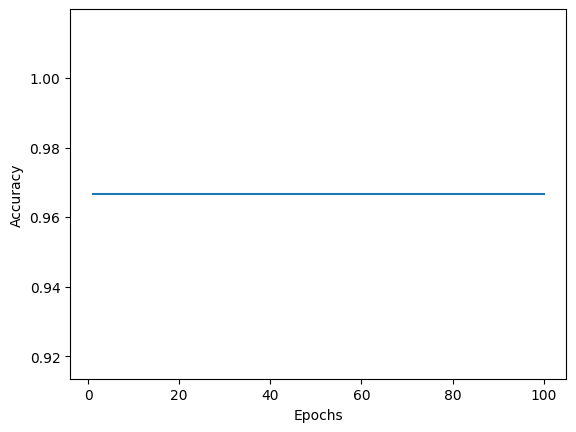

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_test, y_test, epochs=100, verbose=0)

accuracy = history.history['accuracy']
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Função para gerar descrições
def generate_description(seed_text, num_words):
    for _ in range(num_words):
        sequence = tokenizer.texts_to_sequences([seed_text])[0]
        sequence = pad_sequences([sequence], maxlen=context_length, padding='post', truncating='post')
        y_prob = model.predict(sequence, verbose=0)
        y_class = np.argmax(y_prob, axis=-1)
        predicted_word = tokenizer.index_word.get(y_class[0], '')  # Usar index_word para mapear o índice para a palavra
        seed_text += ' ' + predicted_word
    return seed_text

In [ ]:
# Geração de descrição
seed_text = "Hotel near the beach"
generated_description = generate_description(seed_text,30)
print("Descrição gerada:", generated_description)

Descrição gerada: Hotel near the beach from from from from from from from from from from from from from from from from from from from from from from from from from from from from from from


In [ ]:
seed_text = "Hotel in the city center"
generated_description = generate_description(seed_text,30)
print("Descrição gerada:", generated_description)

Descrição gerada: Hotel in the city center from from from from from from from from from from from from from from from from from from from from from from from from from from from from from from


# Description GPT2
https://huggingface.co/gpt2

https://www.kaggle.com/code/changyeop/how-to-fine-tune-gpt-2-for-beginners

In [ ]:
!pip install transformers


In [ ]:
!pip3 install torch torchvision torchaudio

In [6]:
!pip install torch==1.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.10.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch==1.10.0


In [ ]:
pip install --upgrade torch torchvision

In [ ]:
pip install transformers[torch]

     -------------------------------------- 219.1/219.1 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sympy in c:\users\jgjoa\anaconda3\lib\site-packages (from torch!=1.12.0,>=1.9->transformers[torch]) (1.10.1)



In [ ]:
torch.__version__

'2.0.1+cu118'

In [7]:
import torch
from torch.utils.data import TensorDataset
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [8]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TFGPT2Model,TFGPT2LMHeadModel
from transformers import Trainer, TrainingArguments
from transformers import TFTrainer, TFTrainingArguments
import tensorflow as tf

In [ ]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7969, 0.3523, 0.4319],
        [0.8385, 0.5258, 0.4481],
        [0.0715, 0.5836, 0.8261],
        [0.7470, 0.7354, 0.0293],
        [0.5381, 0.2594, 0.3680]])


In [9]:
df_gpt= data[data['idioma']=='en']
df_gpt= df_gpt[data['description']!='']
df_gpt.reset_index(inplace = True)
df_gpt = df_gpt[0:300]

In [ ]:
df_gpt

,index,short_description,description,idioma
0,0,"Nice, France. ((* Sorry, this information is n...","Located in Nice's city center, Best Western Ho...",en
1,1,Notting Hill - Paddington Station Area. ((* So...,"In London's Bayswater district, the Comfort In...",en
2,2,Há várias opções de lazer e entretenimento ao ...,Breakfast is offered daily and rooms feature f...,en
3,3,"Fort Collins North. ((* Sorry, this informatio...","The Elizabeth Hotel, Autograph Collection feat...",en
4,5,"Alivie o stress com massagens, tratamentos cor...","Located in Sattahip, 15 miles from Eastern Sta...",en
...,...,...,...,...
295,352,"Downtown - Centro Historico. ((* Sorry, this i...","In the heart of Mexico City, just 10 minutes’ ...",en
296,353,"Oil City. ((* Sorry, this information is not a...",This lovely hotel is located in Oil City. Ther...,en
297,354,"Blue Ash. ((* Sorry, this information is not a...",Within 2 miles from Cincinnati Blue Ash Airpor...,en
298,355,"Richmond Hill. ((* Sorry, this information is ...",The Holiday Inn Express Savannah South is conv...,en


In [10]:
def load_dataset(dataframe, tokenizer, block_size=128):
    texts = list(dataframe["description"])

    tokenizer.pad_token = tokenizer.eos_token
    encodings = tokenizer.batch_encode_plus(
        texts,
        max_length=block_size,
        truncation=True,
        padding="max_length",
    )

    input_ids = encodings["input_ids"]
    attention_mask = encodings["attention_mask"]

    input_ids = torch.tensor(input_ids)
    attention_mask = torch.tensor(attention_mask)

    dataset = TensorDataset(input_ids, attention_mask)
    return dataset

def load_data_collator(tokenizer, mlm=False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=mlm,
    )
    return data_collator

def load_data_collator(tokenizer, mlm = False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, 
        mlm=mlm,
    )
    return data_collator


def train(train_dataframe, model_name,
          output_dir,
          overwrite_output_dir,
          per_device_train_batch_size,
          num_train_epochs,
          save_steps):
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    train_dataset = load_dataset(train_dataframe, tokenizer)
    #train_dataset = torch.tensor(train_dataset)
    data_collator = load_data_collator(tokenizer)

    tokenizer.save_pretrained(output_dir)

    model = GPT2LMHeadModel.from_pretrained(model_name)

    model.save_pretrained(output_dir)

    training_args = TrainingArguments(
        output_dir=output_dir,
        overwrite_output_dir=overwrite_output_dir,
        per_device_train_batch_size=per_device_train_batch_size,
        num_train_epochs=num_train_epochs,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
    )

    trainer.train()
    trainer.save_model()

In [11]:
# you need to set parameters 
train_dataframe = df_gpt
model_name = 'gpt2'
output_dir = '/content/drive/MyDrive/result'
overwrite_output_dir = False
per_device_train_batch_size = 8
num_train_epochs = 5.0
save_steps = 500

In [ ]:
pip install --upgrade transformers


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: transformers in c:\users\jgjoa\anaconda3\lib\site-packages (4.29.2)


In [ ]:
pip install accelerate

In [ ]:
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

In [ ]:
pip install git+https://github.com/huggingface/accelerate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-iohp1yw1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-iohp1yw1
  Resolved https://github.com/huggingface/accelerate to commit 0226f750257b3bf2cadc4f189f9eef0c764a0467
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.20.0.dev0-py3-none-any.whl size=225769 sha256=13026cd1be8d24393756c7438324ba3b5e3f2f7c17173cfa23b1c48ce41a6e79
  Stored in directory: /tmp/pip-ephem-wheel-cache-76q6581f/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.19.0
    Uninstalling accelerate-0.19.0:
      Succe

Found existing installation: transformers 4.29.2
Uninstalling transformers-4.29.2:
  Successfully uninstalled transformers-4.29.2
     ---------------------------------------- 7.0/7.0 MB 6.3 MB/s eta 0:00:00


In [ ]:
pip install --upgrade accelerate

In [15]:
from accelerate.state import PartialState
PartialState = PartialState()



In [16]:
# It takes about 30 minutes to train in colab.
train(
    train_dataframe=train_dataframe,
    model_name=model_name,
    output_dir=output_dir,
    overwrite_output_dir=overwrite_output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    num_train_epochs=num_train_epochs,
    save_steps=save_steps
)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│ in train:53                                                                                      │
│ in __init__:111                                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1333 in __post_init__      │
│                                                                                                  │
│   1330 │   │   if (                                                                              │
│   1331 │   │   │   self.framework == "pt"                                                        │
│   1332 │   │   │   and is_torch_available()                                                      │
│ ❱ 1333 │   │   │   and (self.device.type != "cuda")                                              │
│   1334 │   │   │   and (get_xla_device_type(self.device) != "GPU")                               │
│   1335 │   │   │   and (self.fp16 or self.fp16_full_eval)                                        │
│   1336 │   │   ):                                                                                │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1697 in device             │
│                                                                                                  │
│   1694 │   │   The device used by this process.                                                  │
│   1695 │   │   """                                                                               │
│   1696 │   │   requires_backends(self, ["torch"])                                                │
│ ❱ 1697 │   │   return self._setup_devices                                                        │
│   1698 │                                                                                         │
│   1699 │   @property                                                                             │
│   1700 │   def n_gpu(self):                                                                      │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:54 in __get__              │
│                                                                                                  │
│    51 │   │   attr = "__cached_" + self.fget.__name__                                            │
│    52 │   │   cached = getattr(obj, attr, None)                                                  │
│    53 │   │   if cached is None:                                                                 │
│ ❱  54 │   │   │   cached = self.fget(obj)                                                        │
│    55 │   │   │   setattr(obj, attr, cached)                                                     │
│    56 │   │   return cached                                                                      │
│    57                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1631 in _setup_devices     │
│                                                                                                  │
│   1628 │   │   │   del os.environ["ACCELERATE_USE_DEEPSPEED"]                                    │
│   1629 │   │   │   self._n_gpu = 1                                                               │
│   1630 │   │   else:                                       

In [ ]:
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel, GPT2TokenizerFast, GPT2Tokenizer


In [ ]:
def load_model(model_path):
    model = GPT2LMHeadModel.from_pretrained(model_path)
    return model


def load_tokenizer(tokenizer_path):
    tokenizer = GPT2Tokenizer.from_pretrained(tokenizer_path)
    return tokenizer


def generate_text(sequence, max_length):
    model_path = "/content/drive/MyDrive/result"
    model = load_model(model_path)
    tokenizer = load_tokenizer(model_path)
    ids = tokenizer.encode(f'{sequence}', return_tensors='pt')
    final_outputs = model.generate(
        ids,
        do_sample=True,
        max_length=max_length,
        pad_token_id=model.config.eos_token_id,
        top_k=50,
        top_p=0.95,
    )
    print(tokenizer.decode(final_outputs[0], skip_special_tokens=True))

In [ ]:
sequence = input() # oil price
max_len = int(input()) # 20
generate_text(sequence, max_len) # oil price for July June which had been low at as low as was originally stated Prices have since resumed

# 3. Description GPT2 v2

https://www.kaggle.com/code/ysthehurricane/text-generation-with-gpt2-huggingface


In [ ]:
from itertools import compress

In [ ]:
CUDA_VISIBLE_DEVICES=0

In [17]:
df_gpt22= data[data['idioma']=='en']
df_gpt22 = df_gpt22['description']
df_gpt22 = df_gpt22[0:100]

In [18]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2', 
                                          bos_token='<|startoftext|>', 
                                          eos_token='<|endoftext|>', 
                                          pad_token='<|pad|>')


tokenizer.encode("sample text")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[39873, 2420]

In [19]:
print("The max model length is {} for this model".format(tokenizer.model_max_length))
print("The beginning of sequence token {} token has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), tokenizer.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), tokenizer.eos_token_id))
print("The padding token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.pad_token_id), tokenizer.pad_token_id))

The max model length is 1024 for this model
The beginning of sequence token <|startoftext|> token has the id 50257
The end of sequence token <|endoftext|> has the id 50256
The padding token <|pad|> has the id 50258


In [20]:
max_flavour = max([len(tokenizer.encode(df_gpt22)) for df_gpt22 in df_gpt22])

print(f'The longest flavour text is {max_flavour} tokens long.')

The longest flavour text is 1017 tokens long.


In [21]:
import torch
torch.manual_seed(42)
from torch.utils.data import Dataset # this is the pytorch class import

class MTGDataset(Dataset):
    def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=max_flavour):
        self.tokenizer = tokenizer # the gpt2 tokenizer we instantiated
        self.input_ids = []
        self.attn_masks = []

        for txt in txt_list:
            """
            This loop will iterate through each entry in the flavour text corpus.
            For each bit of text it will prepend it with the start of text token,
            then append the end of text token and pad to the maximum length with the 
            pad token. 
            """

            encodings_dict = tokenizer('<|startoftext|>'+ txt + '<|endoftext|>', 
                                       truncation=True, 
                                       max_length=max_length, 
                                       padding="max_length")
      
            """
            Each iteration then appends either the encoded tensor to a list,
            or the attention mask for that encoding to a list. The attention mask is
            binary list of 1's or 0's which determine whether the langauge model
            should take that token into consideration or not. 
            """
            
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
    
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [22]:
from torch.utils.data import random_split

dataset = MTGDataset(df_gpt22, tokenizer, max_length=max_flavour)

# Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

f'There are {train_size} samples for training, and {val_size} samples for validation testing'

'There are 80 samples for training, and 20 samples for validation testing'

In [23]:
dataset[0]

(tensor([50257, 43525,   287,  ..., 50258, 50258, 50258]),
 tensor([1, 1, 1,  ..., 0, 0, 0]))

In [24]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), # Sampling for training is random
            batch_size = 1
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = SequentialSampler(val_dataset), # Sampling for validation is sequential as the order doesn't matter.
            batch_size = 1 
        )

In [ ]:
print(torch.cuda.device_count())   # --> 0
print(torch.cuda.is_available())   # --> False
print(torch.version.cuda)          # --> 9.0.176

1
True
11.8


In [25]:
import random
from transformers import GPT2LMHeadModel, GPT2Config
import numpy as np

# Loading the model configuration and setting it to the GPT2 standard settings.
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)

# Create the instance of the model and set the token size embedding length
model = GPT2LMHeadModel.from_pretrained("gpt2", config=configuration)
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# This step is optional but will enable reproducible runs.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


In [26]:
# We wil create a few variables to define the training parameters of the model
# epochs are the training rounds
# the warmup steps are steps at the start of training that are ignored
# every x steps we will sample the model to test the output

epochs = 4
warmup_steps = 1e2
sample_every = 100

In [27]:
from transformers import AdamW
# AdamW is a class from the huggingface library, it is the optimizer we will be using, and 
# we will only be instantiating it with the default parameters. 

optimizer = AdamW(model.parameters(),
                  lr = 5e-4,
                  eps = 1e-8
                )

In [28]:
from transformers import get_linear_schedule_with_warmup

"""
Total training steps is the number of data points, times the number of epochs. 
Essentially, epochs are training cycles, how many times each point will be seen by the model. 
"""

total_steps = len(train_dataloader) * epochs

"""
We can set a variable learning rate which will help scan larger areas of the 
problem space at higher LR earlier, then fine tune to find the exact model minima 
at lower LR later in training.
"""
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

In [29]:
import random
import time
import datetime

def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(0, epochs):

    print(f'Beginning epoch {epoch_i + 1} of {epochs}')

    t0 = time.time()

    total_train_loss = 0

    model.train()
    
    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()        

        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None
                        )

        loss = outputs[0]  

        batch_loss = loss.item()
        total_train_loss += batch_loss
        
        # Get sample every 100 batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print(f'Batch {step} of {len(train_dataloader)}. Loss:{batch_loss}. Time:{elapsed}')

            model.eval()

            sample_outputs = model.generate(
                                    bos_token_id=random.randint(1,30000),
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 200,
                                    top_p=0.95, 
                                    num_return_sequences=1
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print(f'Example output: {tokenizer.decode(sample_output, skip_special_tokens=True)}')
            
            model.train()
            
        loss.backward()

        optimizer.step()

        scheduler.step()
        
    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print(f'Average Training Loss: {avg_train_loss}. Epoch time: {training_time}')

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0
    
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids,  
                             attention_mask = b_masks,
                             labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss
    
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print(f'Validation loss: {avg_val_loss}. Validation Time: {validation_time}')

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print(f'Total training took {format_time(time.time()-total_t0)}')

Beginning epoch 1 of 4
Average Training Loss: 2.461044847406447. Epoch time: 0:00:30
Validation loss: 0.867150854691863. Validation Time: 0:00:02
Beginning epoch 2 of 4
Average Training Loss: 0.5580738987773657. Epoch time: 0:00:28
Validation loss: 0.8215583808720112. Validation Time: 0:00:02
Beginning epoch 3 of 4
Average Training Loss: 0.9664205865934491. Epoch time: 0:00:29
Validation loss: 0.9498650569468736. Validation Time: 0:00:02
Beginning epoch 4 of 4
Average Training Loss: 0.508520532771945. Epoch time: 0:00:30
Validation loss: 0.8976138770580292. Validation Time: 0:00:02
Total training took 0:02:06


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [31]:
import os

output_dir = './'

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.json',
 './merges.txt',
 './added_tokens.json')

In [32]:
model.eval()

prompt = "<|startoftext|>"

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = 300,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

for i, sample_output in enumerate(sample_outputs):
    print("{}: {}\n\n".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: TheThe D Peter Collins features a flat-screen TV, coffee pot and refrigerator on site and a desk decorated with picturesque paintings and paintings. A 24-hour front desk with picturesque furnishings and a bathroom at DeKalb Plantation have also conveniences including a large mirror. A TV is also located in the guest room. The bar is 4.2 miles from DeKalb Plantation. ((* Sorry, this information is not available in the selected language and is shown in EN).


1: F's This new is the indoor outdoor pool, a 15 minute drive from Central Park Southwestern University. It is 4.2 mi from downtown Los Angeles International Airport and the University of California Polytechnic Museum. A variety of restaurants and a 24-hour front desk make it well-equipped for travelers at San Francisco International Airport. Complimentary wireless access to the guestroom can be found at the Guest House. This is an 8-minute drive from the downtown park. ((* Sorry, this information is not available in the selected

# 4. Hotel Description with RNN
https://www.kaggle.com/code/ab971631/beginners-guide-to-text-generation-pytorch

In [ ]:
!pip install torch
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 10.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import string
import unidecode
import random
import torch

In [ ]:
# Check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [ ]:
df_rnn= data[data['idioma']=='en']
df_rnn = df_rnn[0:500]

In [ ]:
text = list(df_rnn['description'])
def joinStrings(text):
    return ' '.join(string for string in text)
text = joinStrings(text)
# text = [item for sublist in author[:5].values for item in sublist]
len(text.split())

70953

Realiza uma limpeza nos dados do conjunto de dados, removendo stopwords (palavras comuns que não contribuem para o significado do texto), pontuações e lematizando as palavras (reduzindo-as à sua forma básica).

In [ ]:
stop = set(nltk.corpus.stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = nltk.stem.wordnet.WordNetLemmatizer()
def clean(doc):
        stop_free = " ".join([i for i in doc.split() if i not in stop])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
        return normalized
test_sentence = clean(text).lower().split()

In [ ]:
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2],test_sentence[i + 3])
            for i in range(len(test_sentence) - 3)]
chunk_len=len(trigrams)
print(trigrams[:4])

[(['located', 'nices'], 'city', 'center'), (['nices', 'city'], 'center', 'best'), (['city', 'center'], 'best', 'western'), (['center', 'best'], 'western', 'hotel')]


In [ ]:
vocab = set(test_sentence)
voc_len=len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [ ]:
inp=[]
tar=[]
for context, target in trigrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        inp.append(context_idxs)
        targ = torch.tensor([word_to_ix[target]], dtype=torch.long)
        tar.append(targ)

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size*2, hidden_size, n_layers,batch_first=True,
                          bidirectional=False)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [ ]:
def train(inp, target):
    hidden = decoder.init_hidden().cuda()
    decoder.zero_grad()
    loss = 0
    
    for c in range(chunk_len):
        output, hidden = decoder(inp[c].cuda(), hidden)
        loss += criterion(output, target[c].cuda())

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len



In [ ]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
!conda install pytorch torchvision cudatoolkit=10.1 -c pytorch



/bin/bash: conda: command not found


In [ ]:
torch.cuda.is_available()

True

In [ ]:
n_epochs = 100
print_every = 10
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.015

decoder = RNN(voc_len, hidden_size, voc_len, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0
if(train_on_gpu):
    decoder.cuda()
for epoch in range(1, n_epochs + 1):
    loss = train(inp,tar)       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 50, loss))
#         print(evaluate('ge', 200), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0


 21s (10 5%) 5.4133]
 50s (20 10%) 3.5520]
 18s (30 15%) 2.3710]
 46s (40 20%) 1.6722]
 11s (50 25%) 1.2293]
 38s (60 30%) 0.9286]
 4s (70 35%) 0.7146]
 34s (80 40%) 0.5580]
 10s (90 45%) 0.4444]
 44s (100 50%) 0.3549]


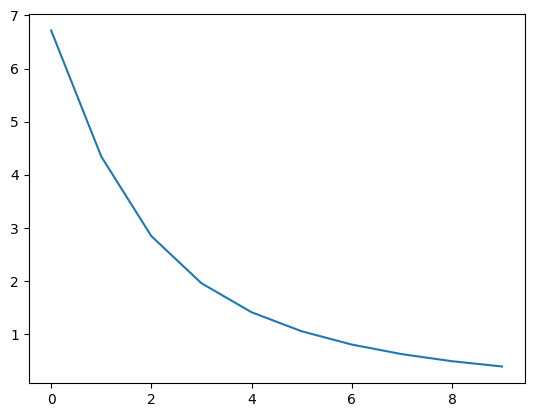

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [ ]:
def evaluate(prime_str='this process', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden().cuda()

    for p in range(predict_len):
        
        prime_input = torch.tensor([word_to_ix[w] for w in prime_str.split()], dtype=torch.long).cuda()
        inp = prime_input[-2:] #last two words as input
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted word to string and use as next input
        predicted_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(top_i)]
        prime_str += " " + predicted_word
#         inp = torch.tensor(word_to_ix[predicted_word], dtype=torch.long)

    return prime_str

In [ ]:
print(evaluate('nices city center', 40, temperature=1))


nices city center embassy quarter harbor valley additional amenity hotel sorry information available selected language shown en property location located alf ringhotel bömers mosellandhotel rural location within vicinity prinzenkopf lookout calmont klettersteig this hotel within vicinity vulkaneifel thermal spa mont royalrooms stay one


In [ ]:
print(evaluate('additional amenity', 40, temperature=1))


additional amenity convenience like wireless internet access additional feature hotel include union station pepsi center united castle mall 4 snack college daily hot breakfast served every day main fresh regional produce enjoy cocktail cigar lounge lunch onsite restaurant free local call free
